In [1]:
#-----------------------------------------
#       German Hernández-2171842
#-----------------------------------------
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp 
from tabulate import tabulate
from sympy.parsing.sympy_parser import parse_expr

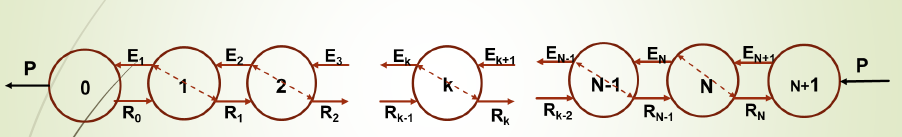

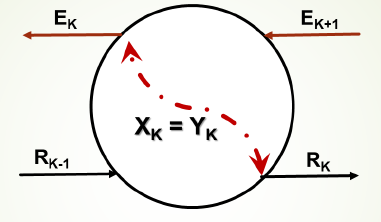

## Retención constante r=k ##

In [2]:

#Funcion para calculos hasta las coordenadas del polo en contracorriente con r=k y NE=0
#Caso donde tengo datos en las corrientes de alimento y conozco XRN
#Nota: En este caso se hara un balance para hallar las corrientes R'N Y E'1 pero eso cambiara en otro problema
def C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	R0p=R0*(1-xI)
	xR0=(R0*xS/R0p)
	N_R0=(R0*xI/R0p)

	#Resolver sistema de ec (1)
	a,b=sp.symbols("a,b")
	e1=sp.Eq(a+b*xR0,N_R0)
	e2=sp.Eq(a+b*Yen1,Nen1)
	sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
	a1=sol[a]
	b1=sol[b]
	#Ec bce de masa
	#Bce=a1+b1*X
	#Resolver sistema de ecuaciones para hallar C_pto minimo de mezcla
	Xm,Nm=sp.symbols("Xm,Nm")
	e_1=sp.Eq(a1+b1*Xm,Nm)
	e_2=sp.Eq(1/r,Nm)
	sol_2=sp.solve([e_1,e_2],Xm,Nm) #arroja un diccionario con la solucion
	Xmin=sol_2[Xm]
	Nmin=sol_2[Nm]

	#Para las k etapas con E'n+1=400
	Epn1m=R0p*((xR0-Xmin)/(Xmin-Yen1))

	alpha=Epn_1/Epn1m
	E_n1P=Epn1m*alpha
	if alpha>1:
		#Funcion de retencion en XR1
		N_R1=1/r
		#Función de arrastre
		N_E=0		
		#Encontrar punto de mezcla
		X_M=(R0p*xR0+E_n1P*Yen1)/(R0p+E_n1P)
		N_M=(R0p*N_R0+E_n1P*Nen1)/(R0p+E_n1P)
	#Conociendo X_RN :
	#M'R'N=> N=a+bX
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	eq1=sp.Eq(a+b*X_M,N_M)
	eq2=sp.Eq(a+b*xRN,NRN) #XRN y NRN se sacaron por balance
	sol12=sp.solve([eq1,eq2],a,b) #arroja un diccionario con la solucion
	a12=sol12[a]
	b12=sol12[b]	
	#Entontrar YE1 y NE1 
	YE1,NE1=sp.symbols("YE1,NE1")
	eq_1=sp.Eq(a12+b12*YE1,NE1)
	eq_2=sp.Eq(0,NE1) #Funcion de arrastre
	sols=sp.solve([eq_1,eq_2],YE1,NE1) #arroja un diccionario con la solucion
	YE1n=sols[YE1]
	NE1n=sols[NE1]	
	#Para hallar las coordenadas del polo
	#1) R0'+P= E'1
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	ecp1=sp.Eq(a+b*xR0,N_R0)
	ecp2=sp.Eq(a+b*YE1n,NE1n)
	sol_p=sp.solve([ecp1,ecp2],a,b) #arroja un diccionario con la solucion
	ap1=sol_p[a]
	bp1=sol_p[b]	
	#Ecuacion 1: N=a1+b1*X
	#2) R0'+P= E'N+1
	a,b=sp.symbols("a,b")
	ep1=sp.Eq(a+b*xRN,NRN)
	ep2=sp.Eq(a+b*Yen1,Nen1)
	sol_pl=sp.solve([ep1,ep2],a,b) #arroja un diccionario con la solucion
	ap2=sol_pl[a]
	bp2=sol_pl[b]
	#Ecuacion 2: N=a2+b2*X		
	#Ahora resolvemos el sistema 
	Xp,Np=sp.symbols("Xp,Np")
	eq_1n=sp.Eq(ap1+bp1*Xp,Np)
	eq_2n=sp.Eq(ap2+bp2*Xp,Np)
	sols_p=sp.solve([eq_1n,eq_2n],Xp,Np) #arroja un diccionario con la solucion
	Xpn=sols_p[Xp]
	Npn=sols_p[Np]		
	return Xpn,Npn,YE1n,NE1n,xR0,N_R0,R0p#R1_N,E1_N,X_M,N_M
#----------------------------------------------------------------------------------------------
#Balance para hallar las corrientes R'N y E'1 
def Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	YE1=Datos[2]
	NE1=Datos[3]
	xR0=Datos[4]
	N_R0=Datos[5]
	R0p=Datos[6]
	R1K,E1K=sp.symbols("R1K,E1K")
	eq_1n=sp.Eq(R0p*xR0+Epn_1*Yen1-R1K*xRN-E1K*YE1,0)
	eq_2n=sp.Eq(R0p*N_R0+Epn_1*Nen1-R1K*NRN-E1K*NE1,0)
	sols_p=sp.solve([eq_1n,eq_2n],R1K,E1K) #arroja un diccionario con la solucion
	R1Kn=sols_p[R1K]
	E1Kn=sols_p[E1K]		
	return R1Kn,E1Kn
#Recomendable cambiar esto para encontrarlos a mano e ingresarlo ya que cambia con cada problema
#--------------------------------------------------------------------------------------------
#Para calcular el numero de etapas N
def EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	Bce_k=Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	#Datos iniciales para el balance
	Rpk_1=Datos[6] #Este dato viene del primer balance
	
	Epk=Bce_k[1]  #Este dato viene del segundo balance y el otro R se usa para el global al final
	
	XRK_1=Datos[4]
	NRK_1=Datos[5]

	YE1=Datos[2]
	XRN=xRN
	X_R1=YE1
	RNS=[]
	ENS=[]   
	N=[]      
	n=0
	while X_R1>XRN:
		#Funcion de retencion
		N_R1=1/r
		#Hago R'1 P' y asi encuentro la composicion YE2,NE2
		#Resolver sistema de ec (1)
		a,b=sp.symbols("a,b")
		e1=sp.Eq(a+b*X_R1,N_R1)
		e2=sp.Eq(a+b*Datos[0],Datos[1])
		sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
		a1=sol[a]
		b1=sol[b]	

		#N=a+bX
		#Se resuelve la ecuacion resultante junto con la ec de arrastre
		YE2,NE2=sp.symbols("YE2,NE2")
		eq_1n=sp.Eq(a1+b1*YE2,NE2)
		eq_2n=sp.Eq(NE2,0)
		sols_p=sp.solve([eq_1n,eq_2n],YE2,NE2) #arroja un diccionario con la solucion
		YE2n=sols_p[YE2]
		NE2n=sols_p[NE2]			
		#Balances:
		R1p=(Rpk_1*NRK_1)/(N_R1)
		
		E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YE2n)

		#Actualizar los valores
		XRK_1=X_R1
		#print(XRK_1)
		NRK_1=N_R1


		YE1=YE2n
		#print(YE1)
		Rpk_1=R1p

		Epk=E2p
		
		X_R1=YE2n
		RNS.append(R1p)
		ENS.append(E2p)        
		B=(Rpk_1+E2p)-(R1p+Epk)			
		if abs(B)==0:
			print("Cierra el balance:",abs(B))
		else: 
			print("Revise los calculos")
		n=n+1
		N.append(n)                
	#Resolver sistema de ec (1)
	ak,bk=sp.symbols("ak,bk")
	e1k=sp.Eq(ak+bk*X_R1,N_R1)
	e2k=sp.Eq(ak+bk*Datos[0],Datos[1])
	solv=sp.solve([e1k,e2k],ak,bk) #arroja un diccionario con la solucion
	a1k=solv[ak]
	b1k=solv[bk]	
	#Se resuelve la ecuacion resultante junto con la ec de arrastre
	YEk,NEk=sp.symbols("YEk,NEk")
	eq_1k=sp.Eq(a1k+b1k*YEk,NEk)
	eq_2k=sp.Eq(NEk,0)
	sols_p=sp.solve([eq_1k,eq_2k],YEk,NEk) #arroja un diccionario con la solucion
	YEkn=sols_p[YEk] #Este valor es negativo porque es una etapa que no es necesaria
	NEkn=sols_p[NEk]			
	#Balances:
	R1p=(Rpk_1*NRK_1)/(N_R1)
	E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YEkn)		
	RNS.append(R1p)
	ENS.append(E2p)
	N.append(n+1)        
	#Tabla
	Datos=np.transpose([N,RNS,ENS])
	Encabezados=["K","R'_K","E'_K+1"]
	print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))			    
	return YE2n,n+1

#C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
#print(C_polo(5000,0.20,0.78,0.072193,2.4483,1/100,0,1,4000))
#print(Bcek(200,0.10,0.85,3/1700,1,0,0,1,400))
#print(EtapaN(200,0.10,0.85,3/1700,1,0,0,1,400))	
print(EtapaN(200,0.10,0.85,3/1700,1,0,0,1,400))



Cierra el balance: 0
Cierra el balance: 0
Cierra el balance: 0
Cierra el balance: 0
╒═════╤════════╤══════════╕
│   K │   R'_K │   E'_K+1 │
╞═════╪════════╪══════════╡
│   1 │    170 │      400 │
├─────┼────────┼──────────┤
│   2 │    170 │      400 │
├─────┼────────┼──────────┤
│   3 │    170 │      400 │
├─────┼────────┼──────────┤
│   4 │    170 │      400 │
├─────┼────────┼──────────┤
│   5 │    170 │      400 │
╘═════╧════════╧══════════╛
(0.00121020778245193, 5)


## Retención constante r'=B  ##

In [7]:

#Funcion para calculos hasta las coordenadas del polo en contracorriente con r=B y NE=0
#Caso donde tengo datos en las corrientes de alimento y conozco XRN
#Nota: En este caso se hara un balance para hallar las corrientes R'N Y E'1 pero eso cambiara en otro problema
def C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	R0p=R0*(1-xI)
	xR0=(R0*xS/R0p)
	N_R0=(R0*xI/R0p)

	#Resolver sistema de ec (1)
	a,b=sp.symbols("a,b")
	e1=sp.Eq(a+b*xR0,N_R0)
	e2=sp.Eq(a+b*Yen1,Nen1)
	sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
	a1=sol[a]
	b1=sol[b]
	#Ec bce de masa
	#Bce=a1+b1*X
	#Resolver sistema de ecuaciones para hallar C_pto minimo de mezcla
	Xm,Nm=sp.symbols("Xm,Nm")
	e_1=sp.Eq(a1+b1*Xm,Nm)
	e_2=sp.Eq((1/r)*(1-Xm),Nm)#---------->Se debe cambiar esta funcion según sea el caso
	sol_2=sp.solve([e_1,e_2],Xm,Nm) #arroja un diccionario con la solucion
	Xmin=sol_2[Xm]
	Nmin=sol_2[Nm]

	#Para las k etapas con E'n+1=400
	Epn1m=R0p*((xR0-Xmin)/(Xmin-Yen1))

	alpha=Epn_1/Epn1m
	E_n1P=Epn1m*alpha
	if alpha>1:
		#Funcion de retencion en XRN
		N_R1=(1/r)*(1-xRN)#-------------->Cambia según sea el caso
		#Función de arrastre
		N_E=0		
		#Encontrar punto de mezcla
		X_M=(R0p*xR0+E_n1P*Yen1)/(R0p+E_n1P)
		N_M=(R0p*N_R0+E_n1P*Nen1)/(R0p+E_n1P)
	#Conociendo X_RN :
	#M'R'N=> N=a+bX
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	eq1=sp.Eq(a+b*X_M,N_M)
	eq2=sp.Eq(a+b*xRN,NRN) #XRN y NRN se sacaron por balance
	sol12=sp.solve([eq1,eq2],a,b) #arroja un diccionario con la solucion
	a12=sol12[a]
	b12=sol12[b]	
	#Entontrar YE1 y NE1 
	YE1,NE1=sp.symbols("YE1,NE1")
	eq_1=sp.Eq(a12+b12*YE1,NE1)
	eq_2=sp.Eq(0,NE1) #Funcion de arrastre
	sols=sp.solve([eq_1,eq_2],YE1,NE1) #arroja un diccionario con la solucion
	YE1n=sols[YE1]
	NE1n=sols[NE1]	
	#Para hallar las coordenadas del polo
	#1) R0'+P= E'1
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	ecp1=sp.Eq(a+b*xR0,N_R0)
	ecp2=sp.Eq(a+b*YE1n,NE1n)
	sol_p=sp.solve([ecp1,ecp2],a,b) #arroja un diccionario con la solucion
	ap1=sol_p[a]
	bp1=sol_p[b]	
	#Ecuacion 1: N=a1+b1*X
	#2) R0'+P= E'N+1
	a,b=sp.symbols("a,b")
	ep1=sp.Eq(a+b*xRN,NRN)
	ep2=sp.Eq(a+b*Yen1,Nen1)
	sol_pl=sp.solve([ep1,ep2],a,b) #arroja un diccionario con la solucion
	ap2=sol_pl[a]
	bp2=sol_pl[b]
	#Ecuacion 2: N=a2+b2*X		
	#Ahora resolvemos el sistema 
	Xp,Np=sp.symbols("Xp,Np")
	eq_1n=sp.Eq(ap1+bp1*Xp,Np)
	eq_2n=sp.Eq(ap2+bp2*Xp,Np)
	sols_p=sp.solve([eq_1n,eq_2n],Xp,Np) #arroja un diccionario con la solucion
	Xpn=sols_p[Xp]
	Npn=sols_p[Np]		
	return Xpn,Npn,YE1n,NE1n,xR0,N_R0,R0p,Xmin,Nmin,X_M,N_M
#----------------------------------------------------------------------------------------------
#Balance para hallar las corrientes R'N y E'1 
def Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	YE1=Datos[2]
	NE1=Datos[3]
	xR0=Datos[4]
	N_R0=Datos[5]
	R0p=Datos[6]
	R1K,E1K=sp.symbols("R1K,E1K")
	eq_1n=sp.Eq(R0p*xR0+Epn_1*Yen1-R1K*xRN-E1K*YE1,0)
	eq_2n=sp.Eq(R0p*N_R0+Epn_1*Nen1-R1K*NRN-E1K*NE1,0)
	sols_p=sp.solve([eq_1n,eq_2n],R1K,E1K) #arroja un diccionario con la solucion
	R1Kn=sols_p[R1K]
	E1Kn=sols_p[E1K]		
	return R1Kn,E1Kn
#Recomendable cambiar esto para encontrarlos a mano cada que el problema lo necesite 
#--------------------------------------------------------------------------------------------
#Para calcular el numero de etapas N
def EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	Bce_k=Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
	#Datos iniciales para el balance
	Rpk_1=Datos[6] #Este dato viene del primer balance
	
	Epk=Bce_k[1]  #Este dato viene del segundo balance y el otro R se usa para el global al final
	
	XRK_1=Datos[4]
	NRK_1=Datos[5]

	YE1=Datos[2]
	XRN=xRN
	X_R1=YE1
	RNS=[]
	ENS=[]   
	N=[]    
	n=0
	while X_R1>XRN:
		#Funcion de retencion en X_R1
		N_R1=(1/r)*(1-X_R1)#------------------------->Cambia según el problema
		#Hago R'1 P' y asi encuentro la composicion YE2,NE2
		#Resolver sistema de ec (1)
		a,b=sp.symbols("a,b")
		e1=sp.Eq(a+b*X_R1,N_R1)
		e2=sp.Eq(a+b*Datos[0],Datos[1])
		sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
		a1=sol[a]
		b1=sol[b]	

		#N=a+bX
		#Se resuelve la ecuacion resultante junto con la ec de arrastre
		YE2,NE2=sp.symbols("YE2,NE2")
		eq_1n=sp.Eq(a1+b1*YE2,NE2)
		eq_2n=sp.Eq(NE2,0)
		sols_p=sp.solve([eq_1n,eq_2n],YE2,NE2) #arroja un diccionario con la solucion
		YE2n=sols_p[YE2]
		NE2n=sols_p[NE2]			
		#Balances:
		R1p=(Rpk_1*NRK_1)/(N_R1)
		#print(N_R1,YE2n)	
		E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YE2n)		
		
		#Actualizar los valores
		XRK_1=X_R1
		#print(XRK_1)
		NRK_1=N_R1
		#print(R1p,E2p)	

		YE1=YE2n
		#print(YE1)
		Rpk_1=R1p

		Epk=E2p
		
		X_R1=YE2n
		RNS.append(R1p)
		ENS.append(E2p)        
		#print(N_R1,YE1)
		B=(Rpk_1+E2p)-(R1p+Epk)			
		if abs(B)==0:
			print("Cierra el balance:",abs(B))
		else: 
			print("Revise los calculos",abs(B))
		n=n+1
		N.append(n)        
	#Resolver sistema de ec (1)
	#Se debe volver a calcular Nr1 para la ultima etapa por el tipo de retención
	N_r1=(1/r)*(1-X_R1)
	ak,bk=sp.symbols("ak,bk")
	e1k=sp.Eq(ak+bk*X_R1,N_r1)
	e2k=sp.Eq(ak+bk*Datos[0],Datos[1])
	solv=sp.solve([e1k,e2k],ak,bk) #arroja un diccionario con la solucion
	a1k=solv[ak]
	b1k=solv[bk]	
	#print(a1k,b1k,X_R1,N_r1)
	#Se resuelve la ecuacion resultante junto con la ec de arrastre
	YEk,NEk=sp.symbols("YEk,NEk")
	eq_1k=sp.Eq(a1k+b1k*YEk,NEk)
	eq_2k=sp.Eq(NEk,0)
	sols_p=sp.solve([eq_1k,eq_2k],YEk,NEk) #arroja un diccionario con la solucion
	YEkn=sols_p[YEk] #Este valor es negativo porque es una etapa que no es necesaria
	NEkn=sols_p[NEk]	
	#print(YEkn)
	#Balances:
	R1p=(Rpk_1*NRK_1)/(N_r1) #----------->Aca tambien cambio Nr1
	E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YEkn)
	RNS.append(R1p)
	ENS.append(E2p)
	N.append(n+1)        
	#Tabla
	Datos=np.transpose([N,RNS,ENS])
	Encabezados=["K","R'_K","E'_K+1"]
	print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))			    
	return YE2n,n+1


#print(C_polo(1000,0.12,0.85,2/501,998/501,0,0,0.5,2000))
#print(Bcek(1000,0.12,0.85,2/501,998/501,0,0,0.5,2000))
#EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,Epn_1)
#print(EtapaN(1000,0.12,0.85,2/501,998/501,0,0,0.5,2000)) #-> problema 5
#print(EtapaN(1000,0.10,0.90,0.000834,0.555092,0,0,9/5,1800)) #->problema 4 de las 41 etapas
print(EtapaN(1300,3/13,10/13,1/151,100/151,1/500,0,1.5,87625/12))#--->problema 8
#print(EtapaN(1000,0.20,0.80,1/101,50/101,0.001,0,2,3100000/487))#--->problema 9
#print(EtapaN(60,0.08,0.88,1/881,550/881,0,0,1.6,116.576))#--->problema 10


Cierra el balance: 0
Cierra el balance: 0
╒═════╤═════════╤══════════╕
│   K │    R'_K │   E'_K+1 │
╞═════╪═════════╪══════════╡
│   1 │ 1578.95 │  7371.03 │
├─────┼─────────┼──────────┤
│   2 │ 1517.2  │  7309.28 │
├─────┼─────────┼──────────┤
│   3 │ 1504.49 │  7296.57 │
╘═════╧═════════╧══════════╛
(0.00298275405098568, 3)


## Retención variable ##

In [4]:
#Programa para resolver sistema 
#de ecuaciones multivaribale por metodo de
#N-R

def NR_multi(V_i,X,v_F,error):
	'''V_i: Vector con valores iniciales.
	   X: Tupla con simbolos a utilizar, cada simbolo 
		  se debe definir entre comillas.
	   v_F: Vector que contiene funciones que definen 
			el sistema de ecuaciones no lineales a resolver,
			cada funcion debe definirse entre comillas.'''
	#Se procede a convertir simbolos str a simbolos de SymPy
	v_Var=sp.symbols(X)
	#Se convierten funciones de str a funciones operables por SymPy
	#Se utiliza una lista comprimida
	Func=[parse_expr(v_F[k]) for k in list(range(0,len(v_F)))] 
	#Se define el Jacobiano
	m_J=[]# Matriz donde se guardaran derivadas
	#Inicia ciclo for para crear Jacobiano y convertir 
	#lista de funciones a columna
	c_F=[]
	for k in list(range(0,len(v_F))):
		v_Deriv=[]
		funcion=Func[k]
		#Ciclo for anidado para ingresar derivadas por filas
		for m in list(range(0,len(v_Var))):
			d_F=sp.diff(funcion,v_Var[m])
			v_Deriv.append(d_F)
		#Fin de for anidado
		c_F.append([Func[k]])
		m_J.append(v_Deriv)
	#Fin de ciclo for
	#Se convierten funciones a expresiones evaluables, que reciben
	#la lista de valores iniciales
	Func_eval=sp.lambdify([v_Var],sp.Matrix(c_F))
	mJ_eval=sp.lambdify([v_Var],sp.Matrix(m_J))
	#Se definen condiciones de iteracion
	V_ic=np.asarray(V_i).reshape(-1,1)#Se transforma vector a matriz
	#con una columna
	Xi=V_ic-np.dot(np.linalg.inv(mJ_eval(V_i)),Func_eval(V_i))
	sum_e=np.sum(np.abs(Xi-V_ic))
	#Inicia ciclo while para solucionar problema
	n=0
	while (sum_e>error):
		n=n+1
		V_i=Xi
		V_if=list(V_i.reshape(1,-1)[0])
		Xi=V_i-np.dot(np.linalg.inv(mJ_eval(V_if)),Func_eval(V_if))
		sum_e=np.sqrt(np.sum((Xi-V_i)**2))
	#Fin de while
	return Xi,sum_e,n
#print(NR_multi([0.5,0.1],("XR","NR"),["-23.591*XR**5 + 42.497*XR**4 - 26.771*XR**3 + 6.3438*XR**2 - 1.0597*XR + 2.5007-NR","-(77/977)+(3850/977)*XR-NR"],0.00001))
#print(NR_multi([0.5,0.1],("XR","NR"),["1.00983233e+03*XR**7-2.56967055e+03*XR**6 + 2.57237437e+03*XR**5-1.27656592e+03*XR**4+ 3.23686595e+02*XR**3-3.88570152e+01*XR**2+1.08309482e+00*XR+ 2.50000000e+00-NR","-(77/977)+(3850/977)*XR-NR"],0.00001))
#print(NR_multi([0.5,0.1],("XR","NR"),["1.00983233e+03*XR**7-2.56967055e+03*XR**6 + 2.57237437e+03*XR**5-1.27656592e+03*XR**4+ 3.23686595e+02*XR**3-3.88570152e+01*XR**2+1.08309482e+00*XR+ 2.50000000e+00-NR","(385/18)*XR-NR"],0.00001))

In [5]:
#Funcion para calculos hasta las coordenadas del polo en contracorriente con  retención variable r=f(X) y NE=0
#Caso donde tengo datos en las corrientes de alimento y conozco XRN
#Nota: En este caso se hara un balance para hallar las corrientes R'N Y E'1 pero eso cambiara en otro problema
def C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1):
	R0p=R0*(1-xI)
	xR0=(R0*xS/R0p)
	N_R0=(R0*xI/R0p)

	#Resolver sistema de ec (1)
	a,b=sp.symbols("a,b")
	e1=sp.Eq(a+b*xR0,N_R0)
	e2=sp.Eq(a+b*Yen1,Nen1)
	sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
	a1=sol[a]
	b1=sol[b]
	#Ec bce de masa
	#Bce=a1+b1*X
	#Resolver sistema de ecuaciones para hallar C_pto minimo de mezcla
	Xm,Nm=sp.symbols("Xm,Nm")
	sol_2=NR_multi([0.5,0.1],("Xm","Nm"),["-23.591*Xm**5 + 42.497*Xm**4 - 26.771*Xm**3 + 6.3438*Xm**2 - 1.0597*Xm + 2.5007-Nm","(-39/989)+(3900/989)*Xm-Nm"],0.00001)
	Xmin=list(sol_2[0][0])
	Nmin=list(sol_2[0][1])
	#Para las k etapas con E'n+1=400
	Epn1m=R0p*((xR0-Xmin[0])/(Xmin[0]-Yen1))

	alpha=Epn_1/Epn1m
	E_n1P=Epn1m*alpha
	if alpha>1:
		#Funcion de retencion en XRN
		N_R1=-23.591*xRN**5 + 42.497*xRN**4 - 26.771*xRN**3 + 6.3438*xRN**2 - 1.0597*xRN + 2.5007#-------------->Cambia según sea el caso
		#Función de arrastre
		N_E=0		
		#Encontrar punto de mezcla
		X_M=(R0p*xR0+E_n1P*Yen1)/(R0p+E_n1P)
		N_M=(R0p*N_R0+E_n1P*Nen1)/(R0p+E_n1P)
	#Conociendo X_RN :
	#M'R'N=> N=a+bX
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	eq1=sp.Eq(a+b*X_M,N_M)
	eq2=sp.Eq(a+b*xRN,NRN) #XRN y NRN se sacaron por balance
	sol12=sp.solve([eq1,eq2],a,b) #arroja un diccionario con la solucion
	a12=sol12[a]
	b12=sol12[b]	
	#Entontrar YE1 y NE1 
	YE1,NE1=sp.symbols("YE1,NE1")
	eq_1=sp.Eq(a12+b12*YE1,NE1)
	eq_2=sp.Eq(0,NE1) #Funcion de arrastre
	sols=sp.solve([eq_1,eq_2],YE1,NE1) #arroja un diccionario con la solucion
	YE1n=sols[YE1]
	NE1n=sols[NE1]	
	#Para hallar las coordenadas del polo
	#1) R0'+P= E'1
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	ecp1=sp.Eq(a+b*xR0,N_R0)
	ecp2=sp.Eq(a+b*YE1n,NE1n)
	sol_p=sp.solve([ecp1,ecp2],a,b) #arroja un diccionario con la solucion
	ap1=sol_p[a]
	bp1=sol_p[b]	
	#Ecuacion 1: N=a1+b1*X
	#2) R0'+P= E'N+1
	a,b=sp.symbols("a,b")
	ep1=sp.Eq(a+b*xRN,NRN)
	ep2=sp.Eq(a+b*Yen1,Nen1)
	sol_pl=sp.solve([ep1,ep2],a,b) #arroja un diccionario con la solucion
	ap2=sol_pl[a]
	bp2=sol_pl[b]
	#Ecuacion 2: N=a2+b2*X		
	#Ahora resolvemos el sistema 
	Xp,Np=sp.symbols("Xp,Np")
	eq_1n=sp.Eq(ap1+bp1*Xp,Np)
	eq_2n=sp.Eq(ap2+bp2*Xp,Np)
	sols_p=sp.solve([eq_1n,eq_2n],Xp,Np) #arroja un diccionario con la solucion
	Xpn=sols_p[Xp]
	Npn=sols_p[Np]		
	return Xpn,Npn,YE1n,NE1n,xR0,N_R0,R0p,Xmin,Nmin,X_M,N_M
#----------------------------------------------------------------------------------------------
#Balance para hallar las corrientes R'N y E'1 
def Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1)
	YE1=Datos[2]
	NE1=Datos[3]
	xR0=Datos[4]
	N_R0=Datos[5]
	R0p=Datos[6]
	R1K,E1K=sp.symbols("R1K,E1K")
	eq_1n=sp.Eq(R0p*xR0+Epn_1*Yen1-R1K*xRN-E1K*YE1,0)
	eq_2n=sp.Eq(R0p*N_R0+Epn_1*Nen1-R1K*NRN-E1K*NE1,0)
	sols_p=sp.solve([eq_1n,eq_2n],R1K,E1K) #arroja un diccionario con la solucion
	R1Kn=sols_p[R1K]
	E1Kn=sols_p[E1K]		
	return R1Kn,E1Kn
#Recomendable cambiar esto para encontrarlos a mano cada que el problema lo necesite 
#--------------------------------------------------------------------------------------------
#Para calcular el numero de etapas N
def EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1)
	Bce_k=Bcek(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1)
	#Datos iniciales para el balance
	Rpk_1=Datos[6] #Este dato viene del primer balance
	
	Epk=Bce_k[1]  #Este dato viene del segundo balance y el otro R se usa para el global al final
	
	XRK_1=Datos[4]
	NRK_1=Datos[5]

	YE1=Datos[2]
	XRN=xRN
	X_R1=YE1
	RNS=[]
	ENS=[]   
	N=[]        
	n=0
	while X_R1>XRN:
		#Funcion de retencion en X_R1
		N_R1=-23.591*X_R1**5 + 42.497*X_R1**4 - 26.771*X_R1**3 + 6.3438*X_R1**2 - 1.0597*X_R1 + 2.5007#-------------->Cambia según sea el caso#-------------->Cambia según sea el caso
		#print(N_R1)        
		#Hago R'1 P' y asi encuentro la composicion YE2,NE2
		#Resolver sistema de ec (1)
		a,b=sp.symbols("a,b")
		e1=sp.Eq(a+b*X_R1,N_R1)
		e2=sp.Eq(a+b*Datos[0],Datos[1])
		sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
		a1=sol[a]
		b1=sol[b]	

		#N=a+bX
		#Se resuelve la ecuacion resultante junto con la ec de arrastre
		YE2,NE2=sp.symbols("YE2,NE2")
		eq_1n=sp.Eq(a1+b1*YE2,NE2)
		eq_2n=sp.Eq(NE2,0)
		sols_p=sp.solve([eq_1n,eq_2n],YE2,NE2) #arroja un diccionario con la solucion
		YE2n=sols_p[YE2]
		NE2n=sols_p[NE2]			
		#Balances:
		R1p=(Rpk_1*NRK_1)/(N_R1)
		#print(N_R1,YE2n)	
		E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YE2n)		
		
		#Actualizar los valores
		XRK_1=X_R1
		#print(XRK_1)
		NRK_1=N_R1

		YE1=YE2n
		#print(YE1)
		Rpk_1=R1p

		Epk=E2p
		
		X_R1=YE2n
		RNS.append(R1p)
		ENS.append(E2p)        
		#print(N_R1,YE1)
		B=(Rpk_1+E2p)-(R1p+Epk)			
		if abs(B)==0:
			print("Cierra el balance:",abs(B))
		else: 
			print("Revise los calculos",abs(B))
		n=n+1
		N.append(n)                
	#Resolver sistema de ec (1)
	#Se debe volver a calcular Nr1 para la ultima etapa porque la retencion no es constante
	N_r1=-23.591*X_R1**5 + 42.497*X_R1**4 - 26.771*X_R1**3 + 6.3438*X_R1**2 - 1.0597*X_R1 + 2.5007#-------------->Cambia según sea el caso#-------------->Cambia según sea el caso
	ak,bk=sp.symbols("ak,bk")
	e1k=sp.Eq(ak+bk*X_R1,N_r1)
	e2k=sp.Eq(ak+bk*Datos[0],Datos[1])
	solv=sp.solve([e1k,e2k],ak,bk) #arroja un diccionario con la solucion
	a1k=solv[ak]
	b1k=solv[bk]	
	#Se resuelve la ecuacion resultante junto con la ec de arrastre
	YEk,NEk=sp.symbols("YEk,NEk")
	eq_1k=sp.Eq(a1k+b1k*YEk,NEk)
	eq_2k=sp.Eq(NEk,0)
	sols_p=sp.solve([eq_1k,eq_2k],YEk,NEk) #arroja un diccionario con la solucion
	YEkn=sols_p[YEk] #Este valor es negativo porque es una etapa que no es necesaria
	NEkn=sols_p[NEk]	
	#print(YEkn)
	#Balances:
	R1p=(Rpk_1*NRK_1)/(N_r1) #----------->Aca tambien cambio Nr1
	E2p=(-Rpk_1*XRK_1+Epk*YE1+R1p*X_R1)/(YEkn)    
	RNS.append(R1p)
	ENS.append(E2p)
	N.append(n+1)        
	#Tabla
	Datos=np.transpose([N,RNS,ENS])
	Encabezados=["K","R'_K","E'_K+1"]
	print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))			    
	return YE2n,n+1


#EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1)
#C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,Epn_1)
#print(Bcek(500,0.20,0.77,0.11347,2.4270,1/50,0,400))
#print(C_polo(500,0.20,0.77,0.11347,2.4270,1/50,0,400))
#print(EtapaN(500,0.20,0.77,0.11347,2.4270,1/50,0,400))#--->problema 13
#print(EtapaN(500,0.25,0.75,0.04665957,4.61929695,3/100,0,400))#--->problema 11
#print(Bcek(5000,0.20,0.78,0.072193,2.4483,1/100,0,4000))#
#print(C_polo(500,0.25,0.75,0.04665957,4.61929695,3/100,0,400))
print(EtapaN(500,0.20,0.77,0.113977,2.43784,1/50,0,400))

Cierra el balance: 0
╒═════╤═════════╤══════════╕
│   K │    R'_K │   E'_K+1 │
╞═════╪═════════╪══════════╡
│   1 │ 163.45  │  405.523 │
├─────┼─────────┼──────────┤
│   2 │ 157.403 │  399.476 │
╘═════╧═════════╧══════════╛
(0.0769310574395494, 2)


## Prueba y error con YE1. r'=B ##

In [8]:
## ---------------------------------------------------------------------------------------------
#Algoritmo para calcular la relacion necesaria de E'N+1/R0 
#_----------------------------------------------------------------------------------------
#Suponer YE1--> Ubicar el polo--> probar que el numero de etapas es igual a N
# Se detendra cuando XRK_cal=XRN
#---------------------------------------------------------------------------------------
def C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n):
	R0p=R0*(1-xI)
	xR0=(R0*xS/R0p)
	N_R0=(R0*xI/R0p)
#-----------------------------------------------------------------------------------------------------------------    
	#Para hallar las coordenadas del polo
	#1) R0'+P= E'1
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	ecp1=sp.Eq(a+b*xR0,N_R0)
	ecp2=sp.Eq(a+b*YE1n,NE1n)
	sol_p=sp.solve([ecp1,ecp2],a,b) #arroja un diccionario con la solucion
	ap1=sol_p[a]
	bp1=sol_p[b]	
	#Ecuacion 1: N=a1+b1*X
	#2) R0'+P= E'N+1
	a,b=sp.symbols("a,b")
	ep1=sp.Eq(a+b*xRN,NRN)
	ep2=sp.Eq(a+b*Yen1,Nen1)
	sol_pl=sp.solve([ep1,ep2],a,b) #arroja un diccionario con la solucion
	ap2=sol_pl[a]
	bp2=sol_pl[b]
	#Ecuacion 2: N=a2+b2*X		
	#Ahora resolvemos el sistema 
	Xp,Np=sp.symbols("Xp,Np")
	eq_1n=sp.Eq(ap1+bp1*Xp,Np)
	eq_2n=sp.Eq(ap2+bp2*Xp,Np)
	sols_p=sp.solve([eq_1n,eq_2n],Xp,Np) #arroja un diccionario con la solucion
	Xpn=sols_p[Xp]
	Npn=sols_p[Np]		
	return Xpn,Npn,xR0,N_R0,R0p,Xmin,Nmin
#----------------------------------------------------------------------------------------------
#Para calcular el numero de etapas N
def EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n)

	XRK_1=Datos[2]
	NRK_1=Datos[3]

	YE1=YE1n
	XRN=xRN
	X_R1=YE1
	n=0
	while X_R1>XRN:
		#Funcion de retencion en X_R1
		N_R1=(1/r)*(1-X_R1)#------------------------->Cambia según el problema
		#Hago R'1 P' y asi encuentro la composicion YE2,NE2
		#Resolver sistema de ec (1)
		a,b=sp.symbols("a,b")
		e1=sp.Eq(a+b*X_R1,N_R1)
		e2=sp.Eq(a+b*Datos[0],Datos[1])
		sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
		a1=sol[a]
		b1=sol[b]	

		#N=a+bX
		#Se resuelve la ecuacion resultante junto con la ec de arrastre
		YE2,NE2=sp.symbols("YE2,NE2")
		eq_1n=sp.Eq(a1+b1*YE2,NE2)
		eq_2n=sp.Eq(NE2,0)
		sols_p=sp.solve([eq_1n,eq_2n],YE2,NE2) #arroja un diccionario con la solucion
		YE2n=sols_p[YE2]
		NE2n=sols_p[NE2]			

		#Actualizar los valores
		XRK_1=X_R1
		#print(XRK_1)
		NRK_1=N_R1
		#print(R1p,E2p)	

		YE1=YE2n
		#print(YE1)
		X_R1=YE2n
		#print(N_R1,YE1)
		n=n+1
		print(n)
	return Datos[0],Datos[1],YE2n,n+1#YE2n,XRN,X_R1,R1p,E2p,n+1,NRK_1,XRK_1,YE1

#C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n)
#EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n)
#print(C_polo(1300,3/13,10/13,1/151,100/151,1/500,0,1.5,1/2,0))
#print(EtapaN(1300,3/13,10/13,1/151,100/151,1/500,0,1.5,0.1478,0))
#print(EtapaN(2875,8/23,10/23,0.024458,0.611442,0,0,1.5,0.2275,0))

## Prueba y error con YE1. Retención variable ##

In [ ]:
## ---------------------------------------------------------------------------------------------
#Algoritmo para calcular la relacion necesaria de E'N+1/R0 
#_----------------------------------------------------------------------------------------
#Suponer YE1--> Ubicar el polo--> probar que el numero de etapas es igual a N
# Se detendra cuando XRK_cal=XRN
#---------------------------------------------------------------------------------------
def C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,YE1n,NE1n):
	R0p=R0*(1-xI)
	xR0=(R0*xS/R0p)
	N_R0=(R0*xI/R0p)
#-----------------------------------------------------------------------------------------------------------------    
	#Para hallar las coordenadas del polo
	#1) R0'+P= E'1
	#Resolver sistema de ec 
	a,b=sp.symbols("a,b")
	ecp1=sp.Eq(a+b*xR0,N_R0)
	ecp2=sp.Eq(a+b*YE1n,NE1n)
	sol_p=sp.solve([ecp1,ecp2],a,b) #arroja un diccionario con la solucion
	ap1=sol_p[a]
	bp1=sol_p[b]	
	#Ecuacion 1: N=a1+b1*X
	#2) R0'+P= E'N+1
	a,b=sp.symbols("a,b")
	ep1=sp.Eq(a+b*xRN,NRN)
	ep2=sp.Eq(a+b*Yen1,Nen1)
	sol_pl=sp.solve([ep1,ep2],a,b) #arroja un diccionario con la solucion
	ap2=sol_pl[a]
	bp2=sol_pl[b]
	#Ecuacion 2: N=a2+b2*X		
	#Ahora resolvemos el sistema 
	Xp,Np=sp.symbols("Xp,Np")
	eq_1n=sp.Eq(ap1+bp1*Xp,Np)
	eq_2n=sp.Eq(ap2+bp2*Xp,Np)
	sols_p=sp.solve([eq_1n,eq_2n],Xp,Np) #arroja un diccionario con la solucion
	Xpn=sols_p[Xp]
	Npn=sols_p[Np]		
	return Xpn,Npn,xR0,N_R0,R0p
#----------------------------------------------------------------------------------------------
#Para calcular el numero de etapas N
def EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,YE1n,NE1n):
	Datos=C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,YE1n,NE1n)

	XRK_1=Datos[2]
	NRK_1=Datos[3]

	YE1=YE1n
	XRN=xRN
	X_R1=YE1
	n=0
	while X_R1>XRN:
		#Funcion de retencion en X_R1
		N_R1=693.85*X_R1**4-268.72*X_R1**3+30.489*X_R1**2-2.844*X_R1+0.6667#------------------------->Cambia según el problema
		#Hago R'1 P' y asi encuentro la composicion YE2,NE2
		#Resolver sistema de ec (1)
		a,b=sp.symbols("a,b")
		e1=sp.Eq(a+b*X_R1,N_R1)
		e2=sp.Eq(a+b*Datos[0],Datos[1])
		sol=sp.solve([e1,e2],a,b) #arroja un diccionario con la solucion
		a1=sol[a]
		b1=sol[b]	

		#N=a+bX
		#Se resuelve la ecuacion resultante junto con la ec de arrastre
		YE2,NE2=sp.symbols("YE2,NE2")
		eq_1n=sp.Eq(a1+b1*YE2,NE2)
		eq_2n=sp.Eq(NE2,0)
		sols_p=sp.solve([eq_1n,eq_2n],YE2,NE2) #arroja un diccionario con la solucion
		YE2n=sols_p[YE2]
		NE2n=sols_p[NE2]			

		#Actualizar los valores
		XRK_1=X_R1
		#print(XRK_1)
		NRK_1=N_R1
		#print(R1p,E2p)	

		YE1=YE2n
		#print(YE1)
		X_R1=YE2n
		#print(N_R1,YE1)
		n=n+1
		print(n)
	return Datos[0],Datos[1],YE2n,n+1#YE2n,XRN,X_R1,R1p,E2p,n+1,NRK_1,XRK_1,YE1

#C_polo(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n)
#EtapaN(R0,xS,xI,xRN,NRN,Yen1,Nen1,r,YE1n,NE1n)
print(EtapaN(2875,8/23,10/23,0.024458,0.611442,0,0,0.2378,0))